<p style="text-align:right"> 04/06/2023 </p>
<img src="BBRR.jpg">
<h1 style="color:#132505; text-align: center">Universidad Castro Carazo</h1>
<h4 style="color:#84867a; text-align: center">Curso: Análisis de Datos</h4>
<h5 style="color:#84867a; text-align: center">Caso por: Sergio Arturo López Badilla ced: 1-1477-0488</h4>

<h2 style="color:#214E34; text-align: center">Bienes Raíces</h2>

<p>Ejercicio de recolección y análisis de datos para la empresa PK2 con el fin de obtener herramientas útiles en el proceso de toma de decisiones que permitan responder las interrogantes de la compañía.<p>
<ol>
    <li>Ingreso anual de las propiedades vendidas</li>
    <li>Tipos de propiedades con mayor facilidad de venta</li>
    <li>Ventas de propiedades por ubicación y factores determinantes</li>
    <li>Costo de las propiedades por tipos residenciales y comerciales</li>
    <li>Propiedades residenciales, ubicación y costo promedio de sus ventas</li>
    <li>Otros datos relevantes</li>
</ol>

<h3 style="color:#214E34">1. Importación de Datos</h3>

In [1]:
import pandas as pd  #Para el manejo de los dataframes
import numpy as np   #Para el manejo de colecciones de datos Listas, Tuplas, Diccionarios...
import matplotlib.pyplot as plt #Para generar las gráficas
import matplotlib as mpl #Para configurar las graficas.

<h3 style="color:#214E34">2. Carga de Datos</h3>


In [2]:
#dfbienes_raices = DataFrame
dfbienes_raices = pd.read_csv("DataSet2.csv", sep = ";")

C:\Users\sergi\AppData\Local\Temp\ipykernel_15960\3195293716.py:2: DtypeWarning: Columns (6,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  dfbienes_raices = pd.read_csv("DataSet2.csv", sep = ";")


In [3]:
dfbienes_raices.head(5)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,13/09/2021,Ansonia,230 WAKELEE AVE,150500,325000,"0,463076923076923",Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,02/10/2020,Ashford,390 TURNPIKE RD,253000,430000,"0,588372093023256",Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,09/03/2021,Avon,5 CHESTNUT DRIVE,130400,179900,"0,724847137298499",Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,13/04/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,"0,695831460674157",Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,02/07/2021,Avon,70 FAR HILLS DRIVE,862330,1447500,"0,595737478411054",Residential,Single Family,NaN,NaN,NaN,NaN


In [4]:
dfbienes_raices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200011 entries, 0 to 200010
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Serial Number     200011 non-null  int64 
 1   List Year         200011 non-null  int64 
 2   Date Recorded     200011 non-null  object
 3   Town              200011 non-null  object
 4   Address           200009 non-null  object
 5   Assessed Value    200011 non-null  int64 
 6   Sale Amount       200011 non-null  object
 7   Sales Ratio       200011 non-null  object
 8   Property Type     66804 non-null   object
 9   Residential Type  60959 non-null   object
 10  Non Use Code      45754 non-null   object
 11  Assessor Remarks  14400 non-null   object
 12  OPM remarks       2761 non-null    object
 13  Location          34569 non-null   object
dtypes: int64(3), object(11)
memory usage: 21.4+ MB


In [5]:
dfbienes_raices.shape #¿Cuántas observaciones y cuántas variables hay en dfbienes_raices?

(200011, 14)

In [6]:
dfbienes_raices.describe()

,Serial Number,List Year,Assessed Value
count,2.000110e+05,200011.000000,2.000110e+05
mean,1.112801e+06,2007.822525,2.207414e+05
std,1.272981e+07,8.656024,1.167689e+06
min,1.070000e+02,2001.000000,0.000000e+00
25%,1.096800e+04,2001.000000,6.917000e+04
50%,2.040100e+04,2002.000000,1.099000e+05
75%,2.000610e+05,2020.000000,1.874300e+05
max,2.000500e+09,2020.000000,1.149242e+08


<h5 style="color:#214E34">2.1 Revisión de encabezados del DataFrame</h5>
<ol>
    <li>Los nombres de las columnas no deben contener espacios en blanco - X</li>
    <li>Los nombres de las columnas no deben comenzar con números - OK</li>
    <li>Si el nombre tiene dos palabras, la letra inicial de la segunda palabra debe ir en mayúscula - X</li>
    <li>No deben existir nombres repetidos - OK</li>

In [7]:
dfbienes_raices.rename({"Serial Number":"serialNumber"}, axis=1, inplace=True)
dfbienes_raices.rename({"List Year":"listYear"}, axis=1, inplace=True)
dfbienes_raices.rename({"Date Recorded":"dateRecorded"}, axis=1, inplace=True)
dfbienes_raices.rename({"Town":"town"}, axis=1, inplace=True)
dfbienes_raices.rename({"Address":"address"}, axis=1, inplace=True)
dfbienes_raices.rename({"Assessed Value":"assessedValue"}, axis=1, inplace=True)
dfbienes_raices.rename({"Sale Amount":"saleAmount"}, axis=1, inplace=True)
dfbienes_raices.rename({"Sales Ratio":"salesRatio"}, axis=1, inplace=True)
dfbienes_raices.rename({"Property Type":"propertyType"}, axis=1, inplace=True)
dfbienes_raices.rename({"Residential Type":"residentialType"}, axis=1, inplace=True)
dfbienes_raices.rename({"Non Use Code":"nonUseCode"}, axis=1, inplace=True)
dfbienes_raices.rename({"Assessor Remarks":"assessorRemarks"}, axis=1, inplace=True)
dfbienes_raices.rename({"OPM remarks":"opmRemarks"}, axis=1, inplace=True)
dfbienes_raices.rename({"Location":"location"}, axis=1, inplace=True)
dfbienes_raices.columns

Index(['serialNumber', 'listYear', 'dateRecorded', 'town', 'address',
       'assessedValue', 'saleAmount', 'salesRatio', 'propertyType',
       'residentialType', 'nonUseCode', 'assessorRemarks', 'opmRemarks',
       'location'],
      dtype='object')

<p>Correcciones realizadas.<p>

<h3 style="color:#214E34">3. Manejo de valores faltantes</h3>

<ol>
    <li>Identificar cómo se muestran los valores faltantes</li>
    <li>Contar la cantidad de valores faltantes en el set de datos</li>
    <li>Imputación de valores numéricos</li>
    <li>Imputación de valores categóricos</li>
    <li>Eliminar filas</li>
</ol>

<h5 style="color:#214E34">3.1 Identificar los valores faltantes</h5>

In [8]:
dfbienes_raices.replace("?", np.nan, inplace = True)
dfbienes_raices.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,2020348,2020,13/09/2021,Ansonia,230 WAKELEE AVE,150500,325000,"0,463076923076923",Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,02/10/2020,Ashford,390 TURNPIKE RD,253000,430000,"0,588372093023256",Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,09/03/2021,Avon,5 CHESTNUT DRIVE,130400,179900,"0,724847137298499",Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,13/04/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,"0,695831460674157",Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,02/07/2021,Avon,70 FAR HILLS DRIVE,862330,1447500,"0,595737478411054",Residential,Single Family,NaN,NaN,NaN,NaN


<h5 style="color:#214E34">3.2 Contar la cantidad de valores faltantes</h5>

In [9]:
dfTemp = dfbienes_raices.isnull()
dfTemp.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,False,False,False,False,False,False,False,False,False,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,True,True,True,True


In [10]:
for column in dfTemp.columns.values.tolist():
    print(column)
    print(dfTemp[column].value_counts())
    print("")

serialNumber
False    200011
Name: serialNumber, dtype: int64

listYear
False    200011
Name: listYear, dtype: int64

dateRecorded
False    200011
Name: dateRecorded, dtype: int64

town
False    200011
Name: town, dtype: int64

address
False    200009
True          2
Name: address, dtype: int64

assessedValue
False    200011
Name: assessedValue, dtype: int64

saleAmount
False    200011
Name: saleAmount, dtype: int64

salesRatio
False    200011
Name: salesRatio, dtype: int64

propertyType
True     133207
False     66804
Name: propertyType, dtype: int64

residentialType
True     139052
False     60959
Name: residentialType, dtype: int64

nonUseCode
True     154257
False     45754
Name: nonUseCode, dtype: int64

assessorRemarks
True     185611
False     14400
Name: assessorRemarks, dtype: int64

opmRemarks
True     197250
False      2761
Name: opmRemarks, dtype: int64

location
True     165442
False     34569
Name: location, dtype: int64



<h5 style="color:#214E34">3.3 Imputación de valores numéricos</h5>

<p>Valores FLOAT = ["assessedValue"], ["saleAmount"], ["salesRatio"]<p>
<p>No se requiere imputación de datos.<p>

<h5 style="color:#214E34">3.4 Imputación de valores categóricos</h5>

<p>Valores Categóricos = ['serialNumber'], ['listYear'], ['dateRecorded'], ['town'], ['address'], ['propertyType'],
       ['residentialType'], ['nonUseCode'], ['assessorRemarks'], ['opmRemarks'],
       ['location']<p>

In [11]:
dfbienes_raices["propertyType"].unique()

array(['Commercial', 'Residential', 'Vacant Land', nan, 'Apartments',
       'Industrial'], dtype=object)

In [12]:
dfbienes_raices["propertyType"].replace(np.nan, "Others", inplace = True)
dfbienes_raices["propertyType"].unique()

array(['Commercial', 'Residential', 'Vacant Land', 'Others', 'Apartments',
       'Industrial'], dtype=object)

<h5 style="color:#214E34">3.5 Eliminar filas con valores faltantes</h5>

In [13]:
valores_faltantes = dfbienes_raices['address'].isna()
datos_faltantes = dfbienes_raices[valores_faltantes]
print(datos_faltantes) #Esta linea imprime el dato que tiene valores faltantes en la columna serialNumber

       serialNumber  listYear dateRecorded        town address  assessedValue  \
88702         10537      2001   05/02/2002    Hartford     NaN              0   
92371         10640      2001   19/12/2001  Bridgeport     NaN        2106020   

      saleAmount        salesRatio propertyType residentialType nonUseCode  \
88702     120000                 0       Others             NaN         16   
92371      45000  46,8004444444444       Others             NaN         25   

      assessorRemarks opmRemarks location  
88702             NaN        NaN      NaN  
92371             NaN        NaN      NaN  


In [14]:
dfbienes_raices.dropna(subset = ["address"], axis=0, inplace=True)
dfbienes_raices.reset_index(drop=True, inplace=True)

In [15]:
dfTemp = dfbienes_raices.isnull()
for column in dfTemp.columns.values.tolist():
    print(column)
    print(dfTemp[column].value_counts())
    print("")

serialNumber
False    200009
Name: serialNumber, dtype: int64

listYear
False    200009
Name: listYear, dtype: int64

dateRecorded
False    200009
Name: dateRecorded, dtype: int64

town
False    200009
Name: town, dtype: int64

address
False    200009
Name: address, dtype: int64

assessedValue
False    200009
Name: assessedValue, dtype: int64

saleAmount
False    200009
Name: saleAmount, dtype: int64

salesRatio
False    200009
Name: salesRatio, dtype: int64

propertyType
False    200009
Name: propertyType, dtype: int64

residentialType
True     139050
False     60959
Name: residentialType, dtype: int64

nonUseCode
True     154257
False     45752
Name: nonUseCode, dtype: int64

assessorRemarks
True     185609
False     14400
Name: assessorRemarks, dtype: int64

opmRemarks
True     197248
False      2761
Name: opmRemarks, dtype: int64

location
True     165440
False     34569
Name: location, dtype: int64



In [16]:
dfbienes_raices.describe()

,serialNumber,listYear,assessedValue
count,2.000090e+05,200009.000000,2.000090e+05
mean,1.112812e+06,2007.822593,2.207331e+05
std,1.272988e+07,8.656040,1.167687e+06
min,1.070000e+02,2001.000000,0.000000e+00
25%,1.096800e+04,2001.000000,6.917000e+04
50%,2.040100e+04,2002.000000,1.099000e+05
75%,2.000610e+05,2020.000000,1.874300e+05
max,2.000500e+09,2020.000000,1.149242e+08


In [17]:
dfbienes_raices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200009 entries, 0 to 200008
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   serialNumber     200009 non-null  int64 
 1   listYear         200009 non-null  int64 
 2   dateRecorded     200009 non-null  object
 3   town             200009 non-null  object
 4   address          200009 non-null  object
 5   assessedValue    200009 non-null  int64 
 6   saleAmount       200009 non-null  object
 7   salesRatio       200009 non-null  object
 8   propertyType     200009 non-null  object
 9   residentialType  60959 non-null   object
 10  nonUseCode       45752 non-null   object
 11  assessorRemarks  14400 non-null   object
 12  opmRemarks       2761 non-null    object
 13  location         34569 non-null   object
dtypes: int64(3), object(11)
memory usage: 21.4+ MB


<h3 style="color:#214E34">4. Estandarización de Datos</h3>
<ol>
    <li>Verificar el dominio de las variables</li>
    <li>Convertir valores numéricos en función de la interpretación del medio</li>
    <li>Normalizar valores entre 0 y 1</li>
    <li>Creación de rangos de valores (Binning)</li>
    <li>Eliminar filas</li>
</ol>

<h5 style="color:#214E34">4.1 Verificar el dominio de las variables</h5>

In [18]:
dfbienes_raices.head(5)

,serialNumber,listYear,dateRecorded,town,address,assessedValue,saleAmount,salesRatio,propertyType,residentialType,nonUseCode,assessorRemarks,opmRemarks,location
0,2020348,2020,13/09/2021,Ansonia,230 WAKELEE AVE,150500,325000,"0,463076923076923",Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,02/10/2020,Ashford,390 TURNPIKE RD,253000,430000,"0,588372093023256",Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,09/03/2021,Avon,5 CHESTNUT DRIVE,130400,179900,"0,724847137298499",Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,13/04/2021,Avon,111 NORTHINGTON DRIVE,619290,890000,"0,695831460674157",Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,02/07/2021,Avon,70 FAR HILLS DRIVE,862330,1447500,"0,595737478411054",Residential,Single Family,NaN,NaN,NaN,NaN


<p>Valores INT = <p>
<ul>
    <li>["assessedValue"] OK </li>
</ul>
<p>Valores FLOAT = <p>
<ul>
    <li>["saleAmount"] X </li>
    <li>["salesRatio"] X </li>
</ul>

In [19]:
dfbienes_raices['saleAmount'] = dfbienes_raices['saleAmount'].str.replace(',', '').astype(float)
dfbienes_raices['salesRatio'] = dfbienes_raices['salesRatio'].str.replace(',', '').astype(float)
dfbienes_raices.dtypes

serialNumber         int64
listYear             int64
dateRecorded        object
town                object
address             object
assessedValue        int64
saleAmount         float64
salesRatio         float64
propertyType        object
residentialType     object
nonUseCode          object
assessorRemarks     object
opmRemarks          object
location            object
dtype: object

In [20]:
dfbienes_raices.describe()

,serialNumber,listYear,assessedValue,saleAmount,salesRatio
count,2.000090e+05,200009.000000,2.000090e+05,1.310700e+05,2.000090e+05
mean,1.112812e+06,2007.822593,2.207331e+05,4.662667e+05,3.981896e+14
std,1.272988e+07,8.656040,1.167687e+06,1.492311e+07,2.487082e+14
min,1.070000e+02,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.096800e+04,2001.000000,6.917000e+04,1.350000e+05,1.481645e+14
50%,2.040100e+04,2002.000000,1.099000e+05,2.257250e+05,4.676106e+14
75%,2.000610e+05,2020.000000,1.874300e+05,3.749000e+05,5.651376e+14
max,2.000500e+09,2020.000000,1.149242e+08,5.000000e+09,9.999574e+14


<p>Valores STRING = <p>
<ul>
    <li>["serialNumber"] X
    <li>["listYear"] X
    <li>["town"] OK
    <li>['address'] OK
    <li>['propertyType'] OK
    <li>['residentialType'] OK
    <li>['nonUseCode'] OK
    <li>['assessorRemarks'] OK
    <li>['opmRemarks'] OK
    <li>['location'] OK
</ul>

In [21]:
dfbienes_raices["listYear"].unique()

array([2020, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2004], dtype=int64)

In [22]:
#Se deben pasar los datos numericos a categóricos
dfbienes_raices['listYear'] = dfbienes_raices['listYear'].astype('str')
dfbienes_raices["listYear"].unique()

array(['2020', '2001', '2002', '2003', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2004'], dtype=object)

In [23]:
dfbienes_raices['serialNumber'] = dfbienes_raices['serialNumber'].astype('str')
dfbienes_raices["serialNumber"].unique()

array(['2020348', '20002', '200212', ..., '32094', '39244', '39267'],
      dtype=object)

<p>Valor Datetime = <p>
<ul>
    <li>['dateRecorded'] X
</ul>

In [24]:
#Se convierten los datos de fecha a valores de fecha
dfbienes_raices["dateRecorded"] = pd.to_datetime(dfbienes_raices["dateRecorded"])
dfbienes_raices["dateRecorded"]

C:\Users\sergi\AppData\Local\Temp\ipykernel_15960\3980768872.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dfbienes_raices["dateRecorded"] = pd.to_datetime(dfbienes_raices["dateRecorded"])


0        2021-09-13
1        2020-02-10
2        2021-09-03
3        2021-04-13
4        2021-02-07
            ...    
200004   2003-06-17
200005   2003-07-22
200006   2004-04-15
200007   2004-03-03
200008   2004-06-02
Name: dateRecorded, Length: 200009, dtype: datetime64[ns]

In [25]:
dfbienes_raices.dtypes

serialNumber               object
listYear                   object
dateRecorded       datetime64[ns]
town                       object
address                    object
assessedValue               int64
saleAmount                float64
salesRatio                float64
propertyType               object
residentialType            object
nonUseCode                 object
assessorRemarks            object
opmRemarks                 object
location                   object
dtype: object

<h3 style="color:#214E34">5. Visualización de Datos</h3>
<p>Preguntas del negocio a responder</p>
<ol>
    <li>Ingreso anual de las propiedades vendidas</li>
    <li>Tipos de propiedades con mayor facilidad de venta</li>
    <li>Ventas de propiedades por ubicación y factores determinantes</li>
    <li>Costo de las propiedades por tipos residenciales y comerciales</li>
    <li>Propiedades residenciales, ubicación y costo promedio de sus ventas</li>
    <li>Otros datos relevantes</li>
</ol>

<h5 style="color:#214E34">5.1 Ingreso anual de las propiedades vendidas</h5>

In [26]:
#Remove all axis
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"] = False
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False

In [27]:
gf = dfbienes_raices.groupby('listYear')['saleAmount'].agg(suma_saleAmount='sum')
gf['suma_saleAmount'] = gf['suma_saleAmount']/1000000
gf

,suma_saleAmount
listYear,
2001,13866.374692
2002,1749.702602
2003,26.358140
2004,0.381000
2005,22.689557
2006,63.705175
2007,33.079436
2008,23.102639
2009,29.598027


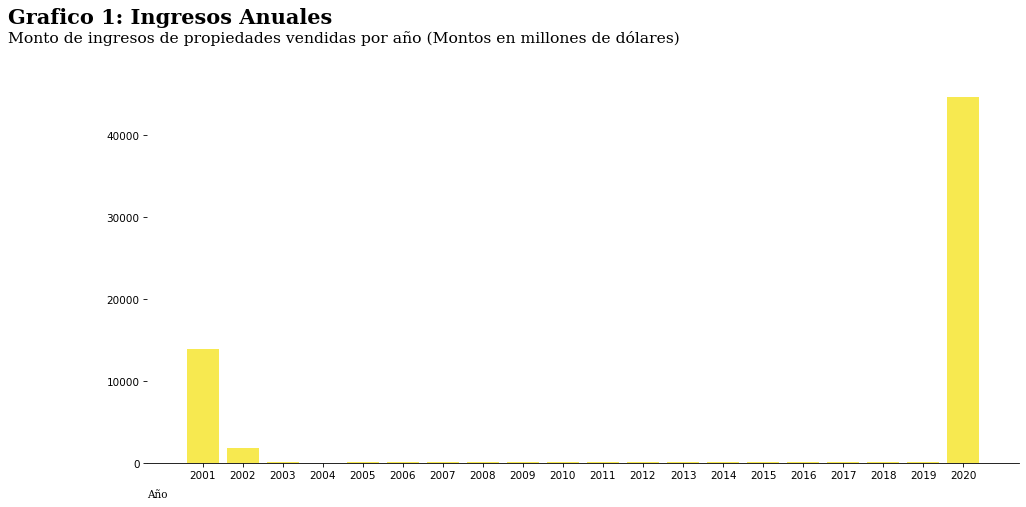

In [28]:
fig, ax = plt.subplots(1,1, figsize=(15,8), dpi=75)

eje_x = gf.index.tolist()
data = gf['suma_saleAmount'].tolist()

bar_colors = ['#F7E950']
ax.bar(eje_x, data, color=bar_colors)

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 1: Ingresos Anuales"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif") 

#FORMATO DEL SUBTITULO
subTitle = "Monto de ingresos de propiedades vendidas por año (Montos en millones de dólares)"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.81,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

 

#FORMATO DE LOS EJES
etiqueta = "Año"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

 

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

 

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.75)
plt.show()

<h5 style="color:#214E34">5.2 Tipos de propiedades con mayor facilidad de venta</h5>

In [29]:
gf = dfbienes_raices.groupby(['propertyType']).count()
gf = gf.iloc[:,:1]
gf = gf.sort_values('propertyType', ascending = False)
gf

,serialNumber
propertyType,
Vacant Land,3157
Residential,60959
Others,133205
Industrial,228
Commercial,1975
Apartments,485


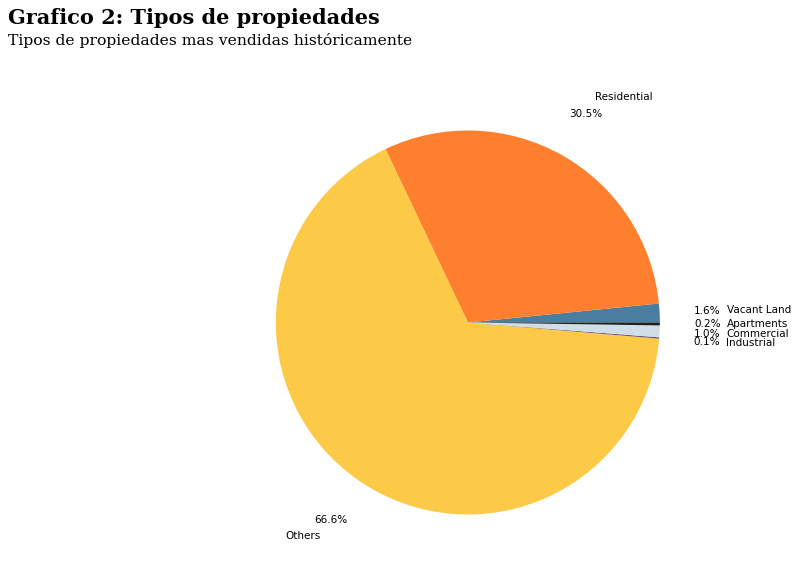

In [30]:
fig, ax = plt.subplots(1,1, figsize=(12,10), dpi=75)

eje_x = gf.index.tolist()
data = gf['serialNumber'].tolist()

bar_colors = ['#4A7E9F', '#FE7F2D', '#FCCA46', '#70566D', '#CFDEE7', '#1E2019']
ax.pie(data, labels=eje_x,colors=bar_colors, autopct='%1.1f%%', pctdistance=1.25, labeldistance=1.35)


#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 2: Tipos de propiedades"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.85,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif") 

#FORMATO DEL SUBTITULO
subTitle = "Tipos de propiedades mas vendidas históricamente"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.75)
plt.show()

<h5 style="color:#214E34">5.3 Ventas de propiedades por ubicación y factores determinantes</h5>

In [31]:
gf = dfbienes_raices.groupby(['town']).count()
gf = gf.iloc[:,:1]
gfbest20 = gf.sort_values('serialNumber', ascending = False).head(20) #Top 20 lugares con mayores ventas (de un total de 169)
gfworst20 = gf.sort_values('serialNumber', ascending = True).head(20) #Top 20 lugares con menores ventas (de un total de 169)
gfbest20

,serialNumber
town,
Stamford,7853
Bridgeport,5977
Norwalk,5872
Danbury,4667
Hartford,4399
Milford,4313
Stratford,4181
Greenwich,4042
West Hartford,3991


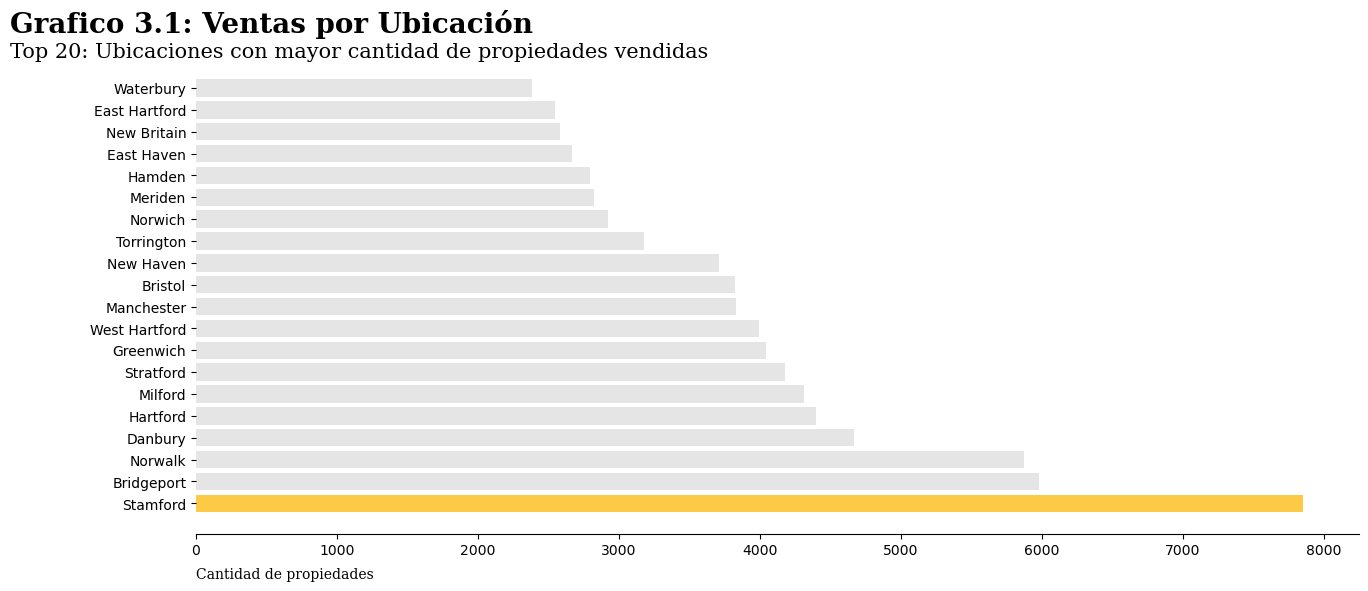

In [32]:
fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=100)

eje_x = gfbest20.index.tolist()
data = gfbest20['serialNumber'].tolist()

bar_colors = ['#FCCA46','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5']
ax.barh(eje_x, data, color=bar_colors)

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 3.1: Ventas por Ubicación"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")

#FORMATO DEL SUBTITULO
subTitle = "Top 20: Ubicaciones con mayor cantidad de propiedades vendidas"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

#FORMATO DE LOS EJES
etiqueta = "Cantidad de propiedades"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.80)
plt.show()

In [33]:
gfworst20

,serialNumber
town,
Hartland,48
Voluntown,76
Union,79
Canaan,81
Bozrah,95
Scotland,116
Warren,119
Hampton,143
Eastford,144


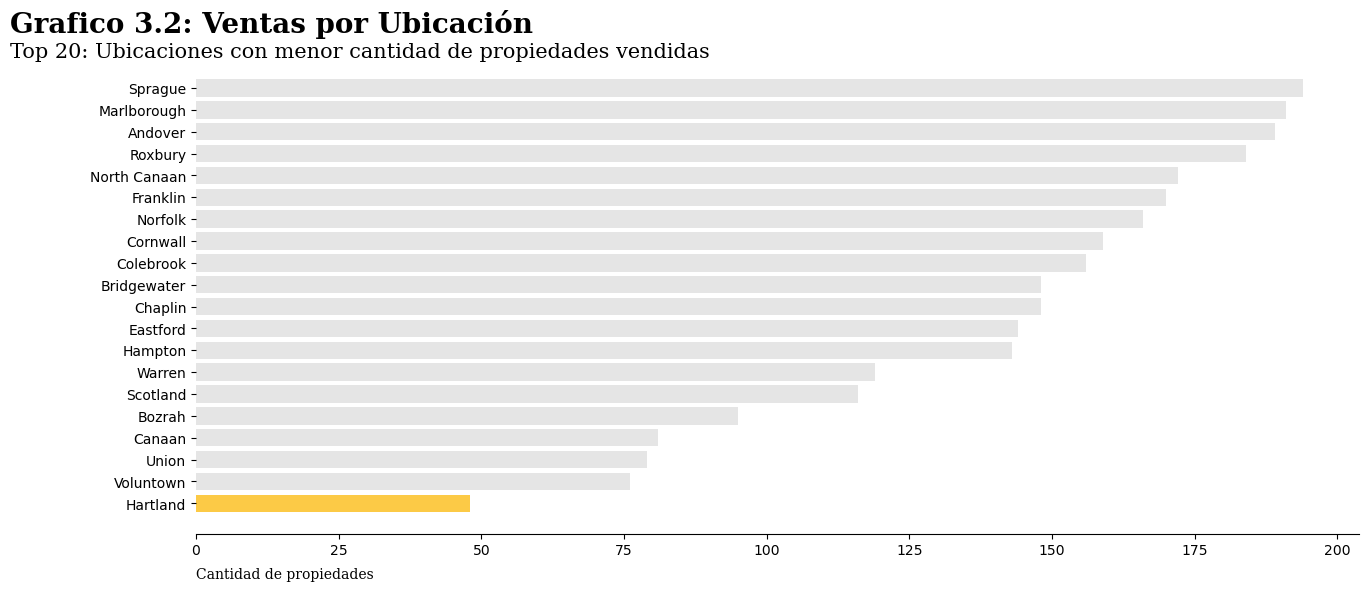

In [34]:
fig, ax = plt.subplots(1,1, figsize=(15,6.9), dpi=100)

eje_x = gfworst20.index.tolist()
data = gfworst20['serialNumber'].tolist()

bar_colors = ['#FCCA46','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5','#e5e5e5',
              '#e5e5e5']
ax.barh(eje_x, data, color=bar_colors)

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 3.2: Ventas por Ubicación"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")

#FORMATO DEL SUBTITULO
subTitle = "Top 20: Ubicaciones con menor cantidad de propiedades vendidas"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 15,
             fontweight = "regular",
             fontfamily = "serif")

#FORMATO DE LOS EJES
etiqueta = "Cantidad de propiedades"
ax.set_xlabel(etiqueta,
              ha = 'left',
              fontsize = 10,
              fontweight = "regular",
              fontfamily = "serif")

#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.80)
plt.show()

<h5 style="color:#214E34">5.4 Costo de las propiedades por tipos residenciales y comerciales</h5>

In [35]:
gf = dfbienes_raices.groupby('propertyType')['assessedValue'].agg(suma_assessedValue='sum')
gf['suma_assessedValue'] = gf['suma_assessedValue'].astype('float')
gf['suma_assessedValue'] = gf['suma_assessedValue']/1000000
gf #costo de venta de propiedades por tipo en millones de dólares

,suma_assessedValue
propertyType,
Apartments,584.895223
Commercial,2721.736084
Industrial,273.141679
Others,22589.037373
Residential,17612.845768
Vacant Land,366.950240


In [36]:
gf_residenciales = dfbienes_raices.groupby('residentialType')['assessedValue'].agg(suma_assessedValue='sum')
gf_residenciales['suma_assessedValue'] = gf_residenciales['suma_assessedValue']/1000000
gf_residenciales = gf_residenciales.sort_values('suma_assessedValue', ascending = False).head(5)
gf_residenciales

,suma_assessedValue
residentialType,
Single Family,12828.585917
Condo,4082.244364
Two Family,465.562887
Three Family,190.799712
Four Family,45.285558


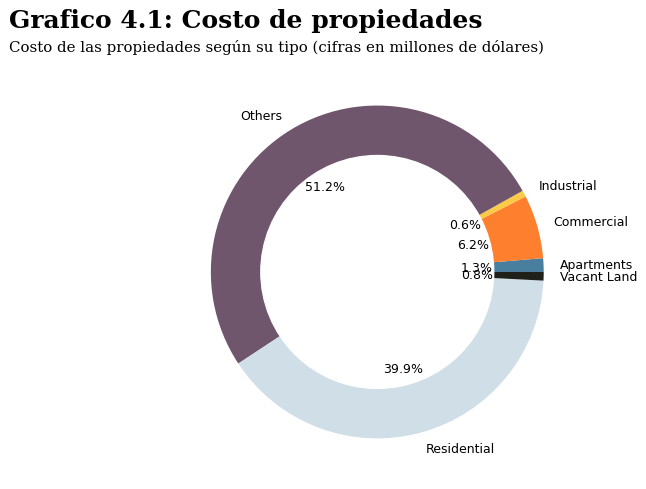

In [37]:
fig, ax = plt.subplots(1,1, figsize=(8,6.9), dpi=90)

names = gf.index.tolist()
stilo = gf['suma_assessedValue'].tolist()

#Crear un círculo
circulo = plt.Circle((0,0),0.7, color = "white")

bar_colors = ['#4A7E9F', '#FE7F2D', '#FCCA46', '#70566D', '#CFDEE7', '#1E2019']
ax.pie(stilo, labels=names,colors=bar_colors, autopct='%1.1f%%')


#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 4.1: Costo de propiedades"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif") 

#FORMATO DEL SUBTITULO
subTitle = "Costo de las propiedades según su tipo (cifras en millones de dólares)"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 12,
             fontweight = "regular",
             fontfamily = "serif")


#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.78)

p = plt.gcf()
p.gca().add_artist(circulo)

plt.show()

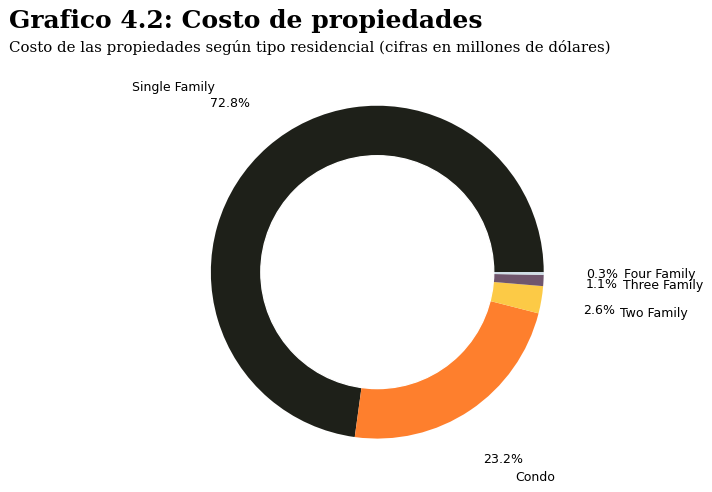

In [38]:
fig, ax = plt.subplots(1,1, figsize=(8,6.9), dpi=90)

names = gf_residenciales.index.tolist()
stilo = gf_residenciales['suma_assessedValue'].tolist()

#Crear un círculo
circulo = plt.Circle((0,0),0.7, color = "white")

bar_colors = ['#1E2019', '#FE7F2D', '#FCCA46', '#70566D', '#CFDEE7', '4A7E9F']
ax.pie(stilo, labels=names,colors=bar_colors, autopct='%1.1f%%',pctdistance=1.35, labeldistance=1.48)

#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 4.2: Costo de propiedades"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif") 

#FORMATO DEL SUBTITULO
subTitle = "Costo de las propiedades según tipo residencial (cifras en millones de dólares)"
ax.set_title(subTitle,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.80,
             transform = fig.transFigure,
             fontsize = 12,
             fontweight = "regular",
             fontfamily = "serif")


#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.78)

p = plt.gcf()
p.gca().add_artist(circulo)

plt.show()

<h5 style="color:#0fff9f">5.5 Propiedades residenciales, ubicación y costo promedio de sus ventas</h5>

In [39]:
#Se crea un nuevo dataframe con los valores de ubicación, costo de venta y tipo de residencia:
gf = {'town': dfbienes_raices['town'], 'residentialType':dfbienes_raices['residentialType'], 'assessedValue':dfbienes_raices['assessedValue']}
df = pd.DataFrame(gf)
df

,town,residentialType,assessedValue
0,Ansonia,NaN,150500
1,Ashford,Single Family,253000
2,Avon,Condo,130400
3,Avon,Single Family,619290
4,Avon,Single Family,862330
...,...,...,...
200004,West Haven,NaN,70700
200005,West Hartford,NaN,240880
200006,East Hartford,NaN,80330
200007,Bristol,NaN,69230


In [40]:
town_frequencies = df['town'].value_counts()

# Seleccionar los tres 'towns' más frecuentes
top_towns = town_frequencies.head(10).index

# Filtrar el DataFrame solo para los tres 'towns' más frecuentes
filtered_df = df[df['town'].isin(top_towns)]

# Calcular el valor promedio de 'assessedValue' por 'residentialType' y 'town'
average_values = filtered_df.groupby(['residentialType', 'town'])['assessedValue'].mean().unstack()
average_values

town,Bridgeport,Danbury,Greenwich,Hartford,Manchester,Milford,Norwalk,Stamford,Stratford,West Hartford
residentialType,,,,,,,,,,
Condo,109215.000000,135383.780161,6.302032e+06,68708.033898,71061.538462,145197.177700,206212.891775,224333.722523,122797.013889,160499.062500
Four Family,NaN,330411.111111,5.368900e+05,126420.000000,167876.190476,NaN,339086.666667,417350.000000,NaN,143080.000000
Single Family,124168.571429,209173.644578,1.771674e+06,67171.523810,133698.214286,238502.901221,462745.195446,484269.058244,187624.125413,228375.322243
Three Family,172285.000000,244353.846154,4.805882e+05,68972.848000,150681.818182,223920.000000,311060.769231,381552.333333,175941.818182,254903.478261
Two Family,203435.000000,194588.000000,4.763125e+05,65777.357143,136577.622378,232538.666667,320516.843750,329615.887097,167801.358025,214198.225806


<Figure size 850x850 with 0 Axes>

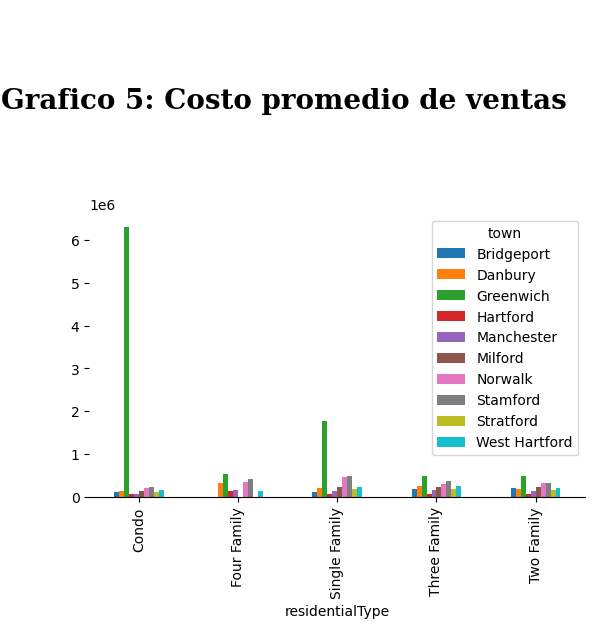

In [41]:
plt.figure(figsize=(10, 10), dpi = 85)
average_values.plot(kind='bar')


#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 5: Costo promedio de ventas"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")

#FORMATO DEL SUBTITULO
subTitle = "Costo Promedio de ventas por ubicación por el tipo residencial"
ax.set_title(subTitle,
             horizontalalignment = 'left') 


#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

ax.yaxis.set_label_coords(x=-0.03,
                          y=0.45,
                          transform=ax.transAxes)
#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 
#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.70)


plt.show()

<h5 style="color:#214E34">5.6 Otros datos relevantes</h5>

* Cantidad de propiedades vendidas de cada tipo por año.

In [47]:
#Se crea un nuevo dataframe con los valores de ubicación, costo de venta y tipo de residencia:
gf = {'listYear': dfbienes_raices['listYear'], 'propertyType':dfbienes_raices['propertyType']}
df = pd.DataFrame(gf)
df

,listYear,propertyType
0,2020,Commercial
1,2020,Residential
2,2020,Residential
3,2020,Residential
4,2020,Residential
...,...,...
200004,2002,Others
200005,2002,Others
200006,2003,Others
200007,2003,Others


In [49]:
df = df.groupby(['listYear', 'propertyType'])['propertyType'].count().unstack()
df

propertyType,Apartments,Commercial,Industrial,Others,Residential,Vacant Land
listYear,,,,,,
2001,NaN,NaN,NaN,59582.0,NaN,NaN
2002,NaN,NaN,NaN,57825.0,NaN,NaN
2003,NaN,NaN,NaN,14873.0,NaN,NaN
2004,NaN,NaN,NaN,4.0,NaN,NaN
2005,NaN,NaN,NaN,79.0,NaN,NaN
2006,NaN,NaN,NaN,91.0,29.0,NaN
2007,NaN,NaN,NaN,58.0,31.0,NaN
2008,NaN,NaN,NaN,42.0,11.0,NaN
2009,NaN,NaN,NaN,65.0,23.0,NaN


<Figure size 850x850 with 0 Axes>

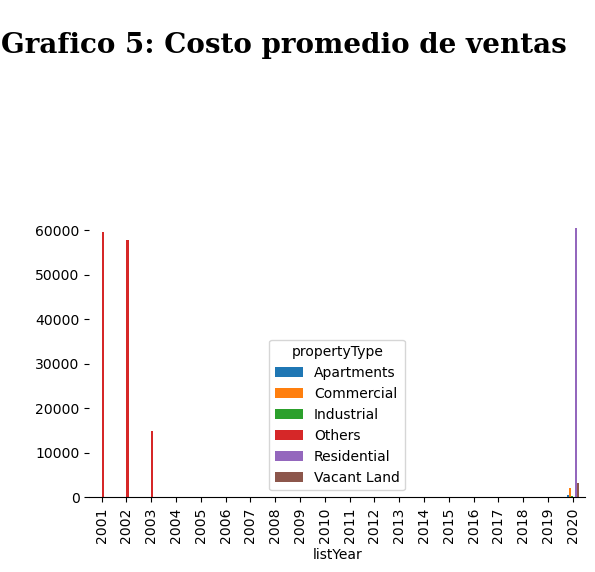

In [50]:
plt.figure(figsize=(10, 10), dpi = 85)
df.plot(kind='bar')


#--------------------------------------------------------------------------------------------------------------------#
#--------------------CONFIGURACION DE LOS TITULOS, SUBTITULOS Y EJES DEL GRAFICO ------------------------------------#
#--------------------------------------------------------------------------------------------------------------------#
#FORMATO DEL TITULO
title = "Grafico 6: Costo promedio de ventas"
plt.suptitle(title,
             horizontalalignment = 'left',
             x = 0.001,
             y = 0.87,
             transform = fig.transFigure,
             fontsize = 20,
             fontweight = "bold",
             fontfamily = "serif")

#FORMATO DEL SUBTITULO
subTitle = "Cantidad de propiedades vendidas por tipo de propiedad por año"
ax.set_title(subTitle,
             horizontalalignment = 'left') 


#CONFIGURACION DE COORDENADAS DE LA ETIQUETA DEL EJE X
ax.xaxis.set_label_coords(x=0,
                          y=-0.07,
                          transform=ax.transAxes)

ax.yaxis.set_label_coords(x=-0.03,
                          y=0.45,
                          transform=ax.transAxes)
#CONFIGURACION EL TAMANO DEL TEXTO DEL EJE Y
ax.tick_params(axis='both',
               labelsize=10)

 
#CONFIGURACION LA UBICACION DEL GRAFICO
plt.subplots_adjust(top=0.70)


plt.show()

<h1 style="color:#214E34; text-align: center">FIN DEL CASO</h1>